In [1]:
##############################################################################################################
# DESCRIPTION: 
# RESULTS:     
#              
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################

class HyperParams:
    pass

IMG_PATH = "C:/TFMDataset/256_0100_1000/work-2-filtered/"

IMG_PATH_VALID = IMG_PATH + "validation/"
IMG_PATH_TEST = IMG_PATH + "test/"
IMG_PATH_TRAIN = IMG_PATH

PERC_TRAIN = 0.8

hyperparams = HyperParams()
hyperparams.IMG_WIDTH = 256
hyperparams.IMG_HEIGHT = 256
hyperparams.EPOCHS = 500
hyperparams.BATCH_SIZE = 32

class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.0898
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.3248

from tensorflow.keras.optimizers import RMSprop
hyperparams.OPTIMIZER = RMSprop(learning_rate=0.0005)

In [3]:
##################
# IMPORTS
##################

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import DatasetUtilsTifF as dsutils
import TrainModel as train
import ReportsH as reports

In [4]:
##################
# MODEL DEFINITION
##################

import ConvSimE as model_factory

model = model_factory.buildModel(hyperparams)
model.summary()
model.optimizer.get_config()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 128, 128, 32) 544         input_1[0][0]                    
__________________________________________________________________________________________________
activation_4 (Activation)       (None, 128, 128, 32) 0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 64, 64, 16)   8208        activation_4[0][0]               
______________________________________________________________________________________________

{'name': 'RMSprop',
 'learning_rate': 0.0005,
 'decay': 0.0,
 'rho': 0.9,
 'momentum': 0.0,
 'epsilon': 1e-07,
 'centered': False}

In [5]:
model.optimizer.get_config()

{'name': 'RMSprop',
 'learning_rate': 0.0005,
 'decay': 0.0,
 'rho': 0.9,
 'momentum': 0.0,
 'epsilon': 1e-07,
 'centered': False}

In [6]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid = dsutils.readDataset( IMG_PATH_TRAIN, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)
val_noisy_files, val_nitid_files, val_noisy, val_nitid = dsutils.readDataset( IMG_PATH_VALID, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid = dsutils.reshapeDataset( train_noisy, train_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
val_noisy, val_nitid = dsutils.reshapeDataset( val_noisy, val_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

Read dataset. Path: C:/TFMDataset/256_0100_1000/work-2-filtered/
Noisy files:606
Nitid files:606
Read dataset. Path: C:/TFMDataset/256_0100_1000/work-2-filtered/validation/
Noisy files:148
Nitid files:148


In [7]:
##################
# TRAIN MODEL
##################
import tensorflow as tf
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)


hist = train.fit( model, hyperparams, train_noisy, train_nitid, val_noisy, val_nitid )

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6

Epoch 1/500
19/19 [==============================] - 6s 65ms/step - loss: 0.0128 - val_loss: 0.0050
Epoch 2/500
19/19 [==============================] - 1s 33ms/step - loss: 0.0051 - val_loss: 0.0033
Epoch 3/500
19/19 [==============================] - 1s 33ms/step - loss: 0.0035 - val_loss: 0.0018
Epoch 4/500
19/19 [==============================] - 1s 33ms/step - loss: 0.0022 - val_loss: 0.0013
Epoch 5/500
19/19 [==============================] - 1s 33ms/step - loss: 0.0022 - val_loss: 0.0012
Epoch 6/500
19/19 [==============================] - 1s 33ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 7/500
19/19 [==============================] - 1s 33ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 8/500
19/19 [==============================] - 1s 34ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 9/500
19/19 [=====================

19/19 [==============================] - 1s 34ms/step - loss: 0.0012 - val_loss: 9.1044e-04
Epoch 80/500
19/19 [==============================] - 1s 34ms/step - loss: 0.0012 - val_loss: 9.0314e-04
Epoch 81/500
19/19 [==============================] - 1s 33ms/step - loss: 0.0012 - val_loss: 9.0474e-04
Epoch 82/500
19/19 [==============================] - 1s 34ms/step - loss: 0.0012 - val_loss: 9.3730e-04
Epoch 83/500
19/19 [==============================] - 1s 34ms/step - loss: 0.0012 - val_loss: 9.2616e-04
Epoch 84/500
19/19 [==============================] - 1s 33ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 85/500
19/19 [==============================] - 1s 34ms/step - loss: 0.0012 - val_loss: 8.9114e-04
Epoch 86/500
19/19 [==============================] - 1s 34ms/step - loss: 0.0012 - val_loss: 8.8706e-04
Epoch 87/500
19/19 [==============================] - 1s 34ms/step - loss: 0.0012 - val_loss: 9.0273e-04
Epoch 88/500
19/19 [==============================] - 1s 34ms/step - los

19/19 [==============================] - 1s 34ms/step - loss: 0.0011 - val_loss: 9.2944e-04
Epoch 158/500
19/19 [==============================] - 1s 33ms/step - loss: 0.0010 - val_loss: 8.4423e-04
Epoch 159/500
19/19 [==============================] - 1s 34ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 160/500
19/19 [==============================] - 1s 34ms/step - loss: 0.0011 - val_loss: 9.3549e-04
Epoch 161/500
19/19 [==============================] - 1s 34ms/step - loss: 0.0010 - val_loss: 8.9099e-04
Epoch 162/500
19/19 [==============================] - 1s 34ms/step - loss: 0.0011 - val_loss: 8.5213e-04
Epoch 163/500
19/19 [==============================] - 1s 34ms/step - loss: 0.0010 - val_loss: 8.5452e-04
Epoch 164/500
19/19 [==============================] - 1s 34ms/step - loss: 0.0010 - val_loss: 8.7239e-04
Epoch 165/500
19/19 [==============================] - 1s 34ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 166/500
19/19 [==============================] - 1s 33ms/step 

Epoch 235/500
19/19 [==============================] - 1s 35ms/step - loss: 9.8986e-04 - val_loss: 8.3779e-04
Epoch 236/500
19/19 [==============================] - 1s 34ms/step - loss: 9.9364e-04 - val_loss: 8.9300e-04
Epoch 237/500
19/19 [==============================] - 1s 34ms/step - loss: 0.0010 - val_loss: 8.5247e-04
Epoch 238/500
19/19 [==============================] - 1s 34ms/step - loss: 9.7608e-04 - val_loss: 8.6450e-04
Epoch 239/500
19/19 [==============================] - 1s 33ms/step - loss: 9.9194e-04 - val_loss: 9.4183e-04
Epoch 240/500
19/19 [==============================] - 1s 34ms/step - loss: 9.9017e-04 - val_loss: 8.2194e-04
Epoch 241/500
19/19 [==============================] - 1s 34ms/step - loss: 0.0010 - val_loss: 8.2431e-04
Epoch 242/500
19/19 [==============================] - 1s 34ms/step - loss: 9.9223e-04 - val_loss: 0.0013
Epoch 243/500
19/19 [==============================] - 1s 34ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 244/500
19/19 [=========

19/19 [==============================] - 1s 34ms/step - loss: 9.5289e-04 - val_loss: 9.8400e-04
Epoch 311/500
19/19 [==============================] - 1s 34ms/step - loss: 9.6859e-04 - val_loss: 8.9833e-04
Epoch 312/500
19/19 [==============================] - 1s 36ms/step - loss: 9.5548e-04 - val_loss: 0.0014
Epoch 313/500
19/19 [==============================] - 1s 35ms/step - loss: 0.0010 - val_loss: 8.4665e-04
Epoch 314/500
19/19 [==============================] - 1s 36ms/step - loss: 9.7764e-04 - val_loss: 8.4730e-04
Epoch 315/500
19/19 [==============================] - 1s 36ms/step - loss: 9.6140e-04 - val_loss: 8.8271e-04
Epoch 316/500
19/19 [==============================] - 1s 34ms/step - loss: 9.4822e-04 - val_loss: 9.9100e-04
Epoch 317/500
19/19 [==============================] - 1s 34ms/step - loss: 9.6704e-04 - val_loss: 8.9223e-04
Epoch 318/500
19/19 [==============================] - 1s 34ms/step - loss: 9.4703e-04 - val_loss: 9.1436e-04
Epoch 319/500
19/19 [===========

19/19 [==============================] - 1s 47ms/step - loss: 8.9752e-04 - val_loss: 8.1247e-04
Epoch 386/500
19/19 [==============================] - 1s 41ms/step - loss: 9.1820e-04 - val_loss: 8.5914e-04
Epoch 387/500
19/19 [==============================] - 1s 43ms/step - loss: 9.2309e-04 - val_loss: 8.7608e-04
Epoch 388/500
19/19 [==============================] - 1s 47ms/step - loss: 9.3648e-04 - val_loss: 8.8575e-04
Epoch 389/500
19/19 [==============================] - 1s 45ms/step - loss: 9.3585e-04 - val_loss: 8.8655e-04
Epoch 390/500
19/19 [==============================] - 1s 46ms/step - loss: 9.1025e-04 - val_loss: 8.4082e-04
Epoch 391/500
19/19 [==============================] - 1s 36ms/step - loss: 9.2180e-04 - val_loss: 9.2981e-04
Epoch 392/500
19/19 [==============================] - 1s 45ms/step - loss: 9.2654e-04 - val_loss: 8.8132e-04
Epoch 393/500
19/19 [==============================] - 1s 44ms/step - loss: 9.6023e-04 - val_loss: 9.2476e-04
Epoch 394/500
19/19 [===

Epoch 460/500
19/19 [==============================] - 1s 41ms/step - loss: 8.7277e-04 - val_loss: 0.0013
Epoch 461/500
19/19 [==============================] - 1s 37ms/step - loss: 8.8803e-04 - val_loss: 8.6153e-04
Epoch 462/500
19/19 [==============================] - 1s 44ms/step - loss: 9.0393e-04 - val_loss: 9.1856e-04
Epoch 463/500
19/19 [==============================] - 1s 42ms/step - loss: 8.9888e-04 - val_loss: 9.3822e-04
Epoch 464/500
19/19 [==============================] - 1s 43ms/step - loss: 8.9282e-04 - val_loss: 8.4417e-04
Epoch 465/500
19/19 [==============================] - 1s 42ms/step - loss: 8.8315e-04 - val_loss: 8.7786e-04
Epoch 466/500
19/19 [==============================] - 1s 45ms/step - loss: 8.8677e-04 - val_loss: 8.2110e-04
Epoch 467/500
19/19 [==============================] - 1s 45ms/step - loss: 8.8185e-04 - val_loss: 0.0010
Epoch 468/500
19/19 [==============================] - 1s 41ms/step - loss: 9.2619e-04 - val_loss: 8.9571e-04
Epoch 469/500
19/1

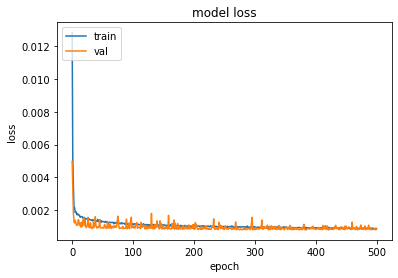

In [8]:
##################
# REPORTS
##################
reports.plotHistory( hist )

In [9]:
##################
# PREDICTIONS
##################
ACCURACY_THRESHOLD = 0.01
predictions_metrics, predictions_headers = reports.calcPredictionMetrics( model, val_noisy, val_nitid, ACCURACY_THRESHOLD, save_pred = False, save_folder_name = "UNET-j", noisy_files = val_noisy_files, nitid_files = val_nitid_files, max_nitid= radiance_limits.nitid_max  )

Images count =148
Best MSE     =143 (0.97)
Best Accuracy=146 (0.99)
MSE-NZ   Pred=0.0009  Noisy=0.0126
MSE      Pred=0.0008  Noisy=0.0111
PSNR     Pred=21.9 dB Noisy=10.8 dB
Accuracy Pred=0.32    Noisy=0.08


Read dataset. Path: C:/TFMDataset/256_0100_1000/work-2-filtered/test/
Noisy files:8
Nitid files:8
Index:0
C:/TFMDataset/256_0100_1000/work-2-filtered/test\VI0112_01_02noisy_idx123.tif
C:/TFMDataset/256_0100_1000/work-2-filtered/test\VI0112_01_02nitid_idx134.tif


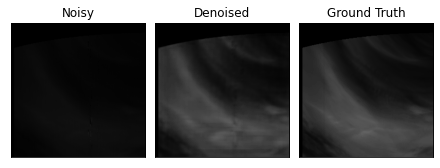

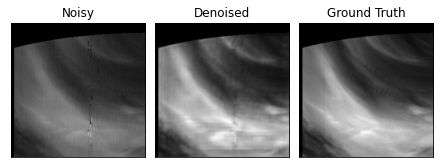

MSE-NZ   Pred=0.0004  Noisy=0.0221
MSE      Pred=0.0003  Noisy=0.0191 BEST
PSNR     Pred=26.3 dB Noisy=8.4 dB BEST
Accuracy Pred=0.47    Noisy=0.00 BEST
******************************************************
Index:1
C:/TFMDataset/256_0100_1000/work-2-filtered/test\VI0127_01_02noisy_idx123.tif
C:/TFMDataset/256_0100_1000/work-2-filtered/test\VI0127_01_02nitid_idx134.tif


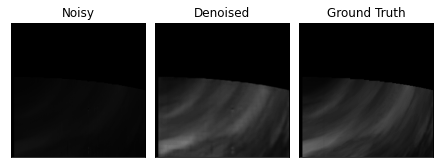

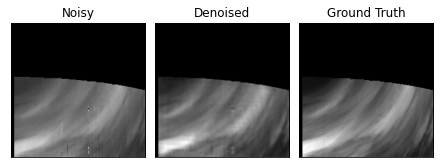

MSE-NZ   Pred=0.0012  Noisy=0.0177
MSE      Pred=0.0007  Noisy=0.0101 BEST
PSNR     Pred=21.1 dB Noisy=9.5 dB BEST
Accuracy Pred=0.16    Noisy=0.05 BEST
******************************************************
Index:2
C:/TFMDataset/256_0100_1000/work-2-filtered/test\VI0318_04_03noisy_idx157.tif
C:/TFMDataset/256_0100_1000/work-2-filtered/test\VI0318_04_03nitid_idx146.tif


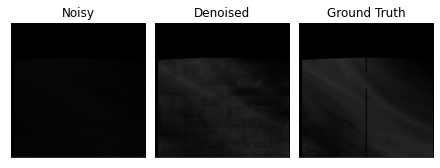

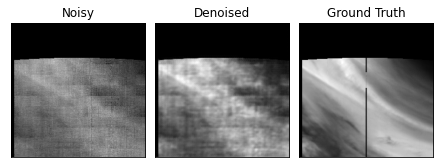

MSE-NZ   Pred=0.0003  Noisy=0.0065
MSE      Pred=0.0003  Noisy=0.0047 BEST
PSNR     Pred=19.7 dB Noisy=6.9 dB BEST
Accuracy Pred=0.45    Noisy=0.04 BEST
******************************************************
Index:3
C:/TFMDataset/256_0100_1000/work-2-filtered/test\VI0322_04_00noisy_idx014.tif
C:/TFMDataset/256_0100_1000/work-2-filtered/test\VI0322_04_00nitid_idx017.tif


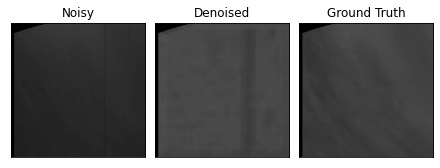

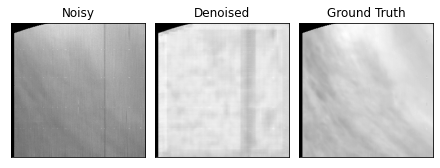

MSE-NZ   Pred=0.0016  Noisy=0.0071
MSE      Pred=0.0015  Noisy=0.0068 BEST
PSNR     Pred=17.9 dB Noisy=11.3 dB BEST
Accuracy Pred=0.16    Noisy=0.00 BEST
******************************************************
Index:4
C:/TFMDataset/256_0100_1000/work-2-filtered/test\VI0322_04_02noisy_idx123.tif
C:/TFMDataset/256_0100_1000/work-2-filtered/test\VI0322_04_02nitid_idx134.tif


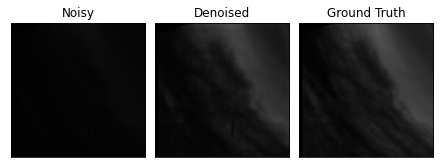

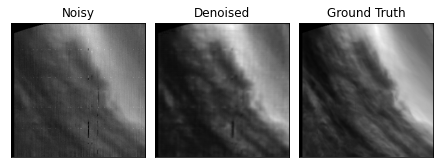

MSE-NZ   Pred=0.0007  Noisy=0.0130
MSE      Pred=0.0007  Noisy=0.0126 BEST
PSNR     Pred=22.0 dB Noisy=9.4 dB BEST
Accuracy Pred=0.19    Noisy=0.02 BEST
******************************************************
Index:5
C:/TFMDataset/256_0100_1000/work-2-filtered/test\VI0323_04_03noisy_idx157.tif
C:/TFMDataset/256_0100_1000/work-2-filtered/test\VI0323_04_03nitid_idx146.tif


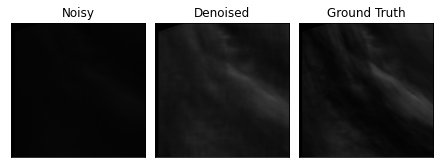

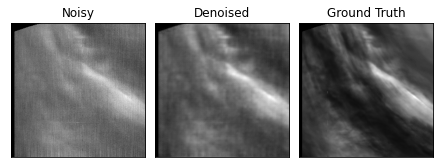

MSE-NZ   Pred=0.0011  Noisy=0.0041
MSE      Pred=0.0011  Noisy=0.0039 BEST
PSNR     Pred=18.6 dB Noisy=12.9 dB BEST
Accuracy Pred=0.24    Noisy=0.12 BEST
******************************************************
Index:6
C:/TFMDataset/256_0100_1000/work-2-filtered/test\VI0379_01_02noisy_idx123.tif
C:/TFMDataset/256_0100_1000/work-2-filtered/test\VI0379_01_02nitid_idx134.tif


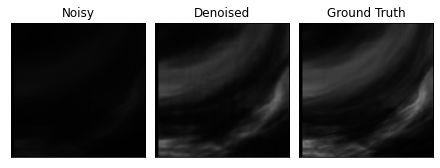

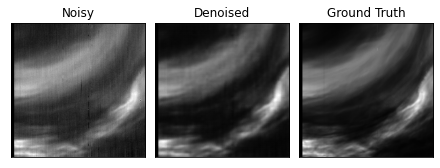

MSE-NZ   Pred=0.0008  Noisy=0.0140
MSE      Pred=0.0008  Noisy=0.0137 BEST
PSNR     Pred=24.9 dB Noisy=12.4 dB BEST
Accuracy Pred=0.24    Noisy=0.08 BEST
******************************************************
Index:7
C:/TFMDataset/256_0100_1000/work-2-filtered/test\VI0379_05_02noisy_idx123.tif
C:/TFMDataset/256_0100_1000/work-2-filtered/test\VI0379_05_02nitid_idx134.tif


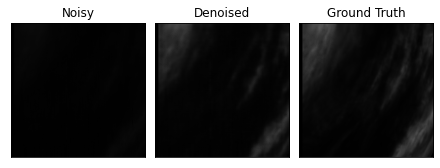

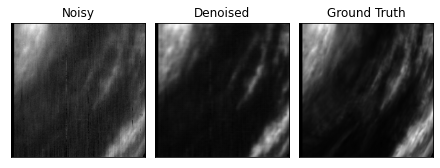

MSE-NZ   Pred=0.0007  Noisy=0.0054
MSE      Pred=0.0007  Noisy=0.0052 BEST
PSNR     Pred=22.2 dB Noisy=13.4 dB BEST
Accuracy Pred=0.41    Noisy=0.22 BEST
******************************************************


In [10]:
test_noisy_files, test_nitid_files, test_noisy, test_nitid = dsutils.readDataset( IMG_PATH_TEST, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)
test_noisy, test_nitid = dsutils.reshapeDataset( test_noisy, test_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
test_indexes = np.arange(0,test_noisy.shape[0])

predictions = reports.predictByIndexes( model, test_noisy, test_nitid, test_noisy_files, test_nitid_files, test_indexes, 
                                      ACCURACY_THRESHOLD )

In [11]:
model.save('C:/Users/rdelasheras/TFMJupyter/saves/convsim-100_1000-256-b')

INFO:tensorflow:Assets written to: C:/Users/rdelasheras/TFMJupyter/saves/convsim-100_1000-256-b\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
